# <center>Total Price Prediction</center>

In [356]:
#import libraries
import pandas as pd
import numpy as np

### Load the data

In [357]:
#load dataset into pandas dataframe
df = pd.read_csv('C:\\Users\\sraks\\AIML Internship\\AIML-Internship\\TASK\\T01\\task01.csv')
df.head()

,Customer ID,Country,State,Postal Code,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Australia,New South Wales,2000,Female,0,Yes,No,1.0,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Australia,New South Wales,2035,Female,0,Yes,No,1.0,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Australia,New South Wales,2014,Male,0,No,No,34.0,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Australia,New South Wales,2041,Male,0,No,No,2.0,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Australia,New South Wales,2050,Male,0,No,No,45.0,No,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No


### Data Cleaning and Preprocessing

In [358]:
#check for null values
df.isnull().sum()

Customer ID          0
Country              0
State                0
Postal Code          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               1
Phone Service        0
Multiple Lines       0
Internet Service     1
Online Security      1
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      2
Total Charges        8
Churn                0
dtype: int64

In [359]:
#Since the data is huge and null values are very small it can be safely dropped
dfv1 = df.dropna()
dfv1.isna().sum()

Customer ID          0
Country              0
State                0
Postal Code          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [360]:
dfv1['Country'].unique()

array(['Australia'], dtype=object)

In [361]:
dfv1['State'].unique()

array(['New South Wales'], dtype=object)

In [362]:
#Drop the factors that doesnt effect our prediction.
dfv2 = dfv1.drop(['Customer ID','Country','State','Postal Code'], axis = 'columns')
dfv2.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No


In [363]:
dfv2['Gender'].unique()

array(['Female', 'Male', 'female'], dtype=object)

In [364]:
dfv2['Gender']=dfv2['Gender'].apply(lambda x : x.lower())
dfv2['Gender'].unique()
dfv2.groupby('Gender')['Gender'].agg('count')

Gender
female    2460
male      2526
Name: Gender, dtype: int64

Data Cleaning and Preprocessing

In [365]:
dfv2['Gender']=dfv2['Gender'].apply(lambda x : 0 if x=='female' else 1)
dfv2.groupby('Gender')['Gender'].agg('count')

Gender
0    2460
1    2526
Name: Gender, dtype: int64

In [366]:
dfv2['Partner'].unique()
dfv2.groupby('Partner')['Partner'].agg('count')

Partner
No     2589
Yes    2397
Name: Partner, dtype: int64

In [367]:
dfv2['Partner']=dfv2['Partner'].apply(lambda x : 1 if x == 'Yes' else 0)
dfv2.groupby('Partner')['Partner'].agg('count')

Partner
0    2589
1    2397
Name: Partner, dtype: int64

In [368]:
dfv2['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [369]:
dfv2.groupby('Dependents')['Dependents'].agg('count')

Dependents
No     3517
Yes    1469
Name: Dependents, dtype: int64

In [370]:
dfv2['Dependents']=dfv2['Dependents'].apply(lambda x : 1 if x == 'Yes' else 0)
dfv2.groupby('Dependents')['Dependents'].agg('count')

Dependents
0    3517
1    1469
Name: Dependents, dtype: int64

In [371]:
dfv2['Phone Service'].unique() 

array(['No', 'Yes', ' '], dtype=object)

In [372]:
dfv2.groupby('Phone Service')['Phone Service'].agg('count')

Phone Service
          1
No      461
Yes    4524
Name: Phone Service, dtype: int64

In [373]:
dfv2.shape

(4986, 20)

In [374]:
#dropped the row containing space
dfv3 = dfv2[dfv2['Phone Service']!=' ']
dfv3.shape

(4985, 20)

In [375]:
dfv3['Phone Service']=dfv3['Phone Service'].apply(lambda x : 1 if x == 'Yes' else 0)
dfv3.groupby('Phone Service')['Phone Service'].agg('count')

C:\Users\sraks\AppData\Local\Temp\ipykernel_21844\3592634444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv3['Phone Service']=dfv3['Phone Service'].apply(lambda x : 1 if x == 'Yes' else 0)


Phone Service
0     461
1    4524
Name: Phone Service, dtype: int64

In [376]:
dfv3['Multiple Lines'].unique()

array(['No phone service', 'No', 'Yes', ' ', 'N0'], dtype=object)

In [377]:
dfv3.groupby('Multiple Lines')['Multiple Lines'].agg('count')

Multiple Lines
                       2
N0                     1
No                  2393
No phone service     461
Yes                 2128
Name: Multiple Lines, dtype: int64

In [378]:
dfv4=dfv3[dfv3['Multiple Lines']!=' ']
dfv4["Multiple Lines"] = np.select([dfv4["Multiple Lines"]=='Yes', dfv4["Multiple Lines"]=='No phone service'], [2,1], default = 0)
dfv4.groupby('Multiple Lines')['Multiple Lines'].agg('count')

C:\Users\sraks\AppData\Local\Temp\ipykernel_21844\3455773104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv4["Multiple Lines"] = np.select([dfv4["Multiple Lines"]=='Yes', dfv4["Multiple Lines"]=='No phone service'], [2,1], default = 0)


Multiple Lines
0    2394
1     461
2    2128
Name: Multiple Lines, dtype: int64

In [379]:
dfv4.shape

(4983, 20)

In [380]:
dfv4['Internet Service'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [381]:
dfv4.groupby('Internet Service')['Internet Service'].agg('count')

Internet Service
DSL            1708
Fiber optic    2186
No             1089
Name: Internet Service, dtype: int64

In [382]:
dfv4['Internet Service']=np.select([dfv4['Internet Service']=='DSL', dfv4['Internet Service']=='Fiber optic'], 
                                   [1, 2], 
                                   default=0)
dfv4.groupby('Internet Service')['Internet Service'].agg('count')

C:\Users\sraks\AppData\Local\Temp\ipykernel_21844\3158345500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv4['Internet Service']=np.select([dfv4['Internet Service']=='DSL', dfv4['Internet Service']=='Fiber optic'],


Internet Service
0    1089
1    1708
2    2186
Name: Internet Service, dtype: int64

In [383]:
dfv4['Online Security'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [384]:
dfv4.groupby('Online Security')['Online Security'].agg('count')

Online Security
No                     2465
No internet service    1089
Yes                    1429
Name: Online Security, dtype: int64

In [385]:
dfv4['Online Security']=np.select([dfv4['Online Security']=='Yes', dfv4['Online Security']=='No'], 
                                   [2, 0], 
                                   default=1)
dfv4.groupby('Online Security')['Online Security'].agg('count')

C:\Users\sraks\AppData\Local\Temp\ipykernel_21844\696192688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv4['Online Security']=np.select([dfv4['Online Security']=='Yes', dfv4['Online Security']=='No'],


Online Security
0    2465
1    1089
2    1429
Name: Online Security, dtype: int64

In [386]:
dfv4['Online Backup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [387]:
dfv4.groupby('Online Backup')['Online Backup'].agg('count')

Online Backup
No                     2174
No internet service    1089
Yes                    1720
Name: Online Backup, dtype: int64

In [388]:
dfv4['Online Backup']=np.select([dfv4['Online Backup']=='Yes', dfv4['Online Backup']=='No'], 
                                   [2, 0], 
                                   default=1)
dfv4.groupby('Online Backup')['Online Backup'].agg('count')

C:\Users\sraks\AppData\Local\Temp\ipykernel_21844\2666829695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv4['Online Backup']=np.select([dfv4['Online Backup']=='Yes', dfv4['Online Backup']=='No'],


Online Backup
0    2174
1    1089
2    1720
Name: Online Backup, dtype: int64

In [389]:
dfv4['Device Protection'].unique()

array(['No', 'Yes', 'No internet service', 'N0'], dtype=object)

In [390]:
dfv4.groupby('Device Protection')['Device Protection'].agg('count')

Device Protection
N0                        1
No                     2170
No internet service    1089
Yes                    1723
Name: Device Protection, dtype: int64

In [391]:
dfv4['Device Protection']=np.select([dfv4['Device Protection']=='Yes', dfv4['Device Protection']=='No internet service'], 
                                   [2, 1], 
                                   default=0)
dfv4.groupby('Device Protection')['Device Protection'].agg('count')

C:\Users\sraks\AppData\Local\Temp\ipykernel_21844\722281262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv4['Device Protection']=np.select([dfv4['Device Protection']=='Yes', dfv4['Device Protection']=='No internet service'],


Device Protection
0    2171
1    1089
2    1723
Name: Device Protection, dtype: int64

In [392]:
dfv4['Tech Support'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [393]:
dfv4.groupby('Tech Support')['Tech Support'].agg('count')

Tech Support
No                     2473
No internet service    1089
Yes                    1421
Name: Tech Support, dtype: int64

In [394]:
dfv4['Tech Support']=np.select([dfv4['Tech Support']=='Yes', dfv4['Tech Support']=='No'], 
                                   [2, 0], 
                                   default=1)
dfv4.groupby('Tech Support')['Tech Support'].agg('count')

C:\Users\sraks\AppData\Local\Temp\ipykernel_21844\2832822212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv4['Tech Support']=np.select([dfv4['Tech Support']=='Yes', dfv4['Tech Support']=='No'],


Tech Support
0    2473
1    1089
2    1421
Name: Tech Support, dtype: int64

In [395]:
dfv4['Streaming TV'].unique()
dfv4.groupby('Streaming TV')['Streaming TV'].agg('count')

Streaming TV
N0                        1
No                     1980
No internet service    1088
No internetservice        1
Yes                    1913
Name: Streaming TV, dtype: int64

In [396]:
dfv4['Streaming TV']=np.select([dfv4['Streaming TV']=='Yes', dfv4['Streaming TV']=='No internet service', dfv4['Streaming TV']=='No internetservice'], 
                                   [2, 1, 1], 
                                   default=0)
dfv4.groupby('Streaming TV')['Streaming TV'].agg('count')

C:\Users\sraks\AppData\Local\Temp\ipykernel_21844\663273780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv4['Streaming TV']=np.select([dfv4['Streaming TV']=='Yes', dfv4['Streaming TV']=='No internet service', dfv4['Streaming TV']=='No internetservice'],


Streaming TV
0    1981
1    1089
2    1913
Name: Streaming TV, dtype: int64

In [397]:
dfv4['Streaming Movies'].unique()
dfv4.groupby('Streaming Movies')['Streaming Movies'].agg('count')

Streaming Movies
                          1
No                     1950
No internet service    1088
Yes                    1944
Name: Streaming Movies, dtype: int64

In [398]:
dfv5 = dfv4[dfv4['Streaming Movies']!=' ']
dfv5['Streaming Movies']=np.select([dfv5['Streaming Movies']=='Yes', dfv5['Streaming Movies']=='No internet service'], 
                                   [2, 1], 
                                   default=0)
dfv5.groupby('Streaming Movies')['Streaming Movies'].agg('count')

Streaming Movies
0    1951
1    1088
2    1944
Name: Streaming Movies, dtype: int64

In [399]:
dfv5['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [400]:
dfv5.groupby('Contract')['Contract'].agg('count')

Contract
Month-to-month    2770
One year          1027
Two year          1186
Name: Contract, dtype: int64

In [401]:
dfv5['Contract']=np.select([dfv5['Contract']=='Month-to-month', dfv5['Contract']=='One year'], 
                           [0, 1],
                           default=2)
dfv5.groupby('Contract')['Contract'].agg('count')

Contract
0    2770
1    1027
2    1186
Name: Contract, dtype: int64

In [402]:
dfv5['Paperless Billing'].unique()

array(['Yes', 'No'], dtype=object)

In [403]:
dfv5.groupby('Paperless Billing')['Paperless Billing'].agg('count')

Paperless Billing
No     2039
Yes    2944
Name: Paperless Billing, dtype: int64

In [404]:
dfv5['Paperless Billing']=dfv5['Paperless Billing'].apply(lambda x : 1 if x == 'Yes' else 0)
dfv5.groupby('Paperless Billing')['Paperless Billing'].agg('count')

Paperless Billing
0    2039
1    2944
Name: Paperless Billing, dtype: int64

In [405]:
dfv5['Payment Method'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [406]:
dfv5.groupby('Payment Method')['Payment Method'].agg('count')

Payment Method
Bank transfer (automatic)    1101
Credit card (automatic)      1086
Electronic check             1667
Mailed check                 1129
Name: Payment Method, dtype: int64

In [407]:
dfv5['Payment Method']=np.select([dfv5['Payment Method']=='Bank transfer (automatic)', dfv5['Payment Method']=='Credit card (automatic)', dfv5['Payment Method']=='Electronic check'],
                                 [0,1,2],
                                 default=3)


In [408]:
dfv5.groupby('Payment Method')['Payment Method'].agg('count')

Payment Method
0    1101
1    1086
2    1667
3    1129
Name: Payment Method, dtype: int64

In [409]:
dfv5.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [410]:
dfv5.groupby('Churn')['Churn'].agg('count')

Churn
No     3672
Yes    1311
Name: Churn, dtype: int64

In [411]:
dfv5.Churn=dfv5.Churn.apply(lambda x : 1 if x == 'Yes' else 0)
dfv5.groupby('Churn')['Churn'].agg('count')

Churn
0    3672
1    1311
Name: Churn, dtype: int64

In [412]:
dfv5

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,0,0,1,0,1.0,0,1,1,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,1,0,1.0,0,1,1,0,2,0,0,0,0,0,1,2,29.85,29.85,0
2,1,0,0,0,34.0,1,0,1,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
3,1,0,0,0,2.0,1,0,1,2,2,0,0,0,0,0,1,3,53.85,108.15,1
4,1,0,0,0,45.0,0,1,1,2,0,2,2,0,0,1,0,0,42.3,1840.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,1,0,1,0,51.0,0,1,1,0,2,0,0,0,0,0,1,1,30.05,1529.45,0
4994,1,0,1,1,72.0,0,1,1,2,2,2,2,2,2,2,1,0,65.65,4664.50,0
4995,0,0,0,0,18.0,1,0,2,2,0,0,0,2,2,0,1,2,96.05,1740.70,1
4996,0,0,0,0,7.0,1,2,2,0,0,0,0,0,0,0,1,0,75.1,552.95,1


is_float function converts the datapoints to float values.

In [413]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

#prints the dataframe containing the datapoints other than float in Monthly Charges.
dfv5[~dfv5['Monthly Charges'].apply(is_float)]


,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
4774,1,0,0,0,44.0,0,1,1,0,2,2,0,2,2,1,1,3,"53,95",2375.4,1


In [414]:
#Replace the string value 53,95 by 53.95
dfv5['Monthly Charges'].loc[4774]=53.95
dfv5['Monthly Charges'].loc[4774]

C:\Users\sraks\AppData\Local\Temp\ipykernel_21844\3906737598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv5['Monthly Charges'].loc[4774]=53.95


53.95

Plot a scatter plot

In [417]:
import matplotlib.pyplot as plt
%matplotlib inline
cn = list(dfv5.columns)
cn
remove = [-2]
for i in remove:
    cn.pop(i)  
cn

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'tenure',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Monthly Charges',
 'Churn']

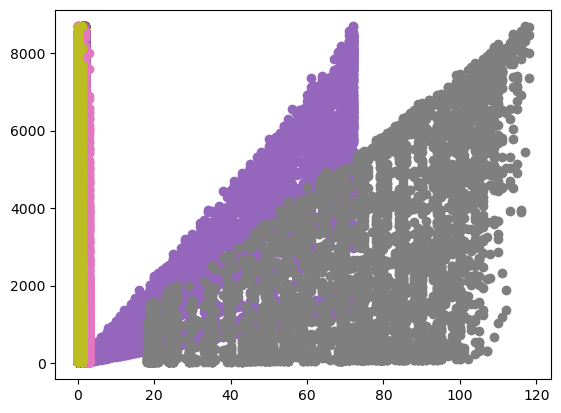

In [418]:
dfv5['Monthly Charges']=dfv5['Monthly Charges'].astype(float)
d = dfv5.copy()
d = d.astype(int)
for i in cn:
    plt.scatter(d[i], d['Total Charges'])

In [419]:
dfv5.dtypes

Gender                 int64
Senior Citizen         int64
Partner                int64
Dependents             int64
tenure               float64
Phone Service          int64
Multiple Lines         int32
Internet Service       int32
Online Security        int32
Online Backup          int32
Device Protection      int32
Tech Support           int32
Streaming TV           int32
Streaming Movies       int32
Contract               int32
Paperless Billing      int64
Payment Method         int32
Monthly Charges      float64
Total Charges        float64
Churn                  int64
dtype: object

### Split the data set into Training set and Testing set.

In [420]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dfv5.drop(['Total Charges'], axis = "columns"), dfv5['Total Charges'], test_size=0.2)
len(x_train), len(x_test)

(3986, 997)

## Model Building

### Training the model using Linear Regressin

In [434]:
from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()
lmodel.fit(x_train, y_train)
lmodel.score(x_train, y_train) , lmodel.score(x_test, y_test)

(0.9063399425538057, 0.9030955187656609)

KFolad cross validation

In [435]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lmodel, dfv5.drop(['Total Charges'], axis = "columns"), dfv5['Total Charges'], cv = 5)
avy_score = np.average(scores)
avy_score

0.9047024748648257

### Training the model using Lesso Regularization (L1 Regularization)

In [436]:
from sklearn.linear_model import Lasso
lreg = Lasso(alpha=40, max_iter = 100, tol = 0.1)
lreg.fit(x_train, y_train)
lreg.score(x_train, y_train), lreg.score(x_test, y_test)

(0.9023416021064542, 0.9010376724745339)

KFold cross validation

In [437]:
scores = cross_val_score(lreg, dfv5.drop(['Total Charges'], axis = "columns"), dfv5['Total Charges'], cv = 5)
avy_score = np.average(scores)
avy_score

0.9010019137943024

### Training the model using Ridge Regression (L2 Regularization)

In [438]:
from sklearn.linear_model import Ridge
rreg = Ridge(alpha=40, max_iter = 100, tol = 0.1)
rreg.fit(x_train, y_train)
rreg.score(x_train, y_train), rreg.score(x_test, y_test)

(0.9063203859555397, 0.9031024354195708)

KFold cross validation

In [439]:
scores = cross_val_score(rreg, dfv5.drop(['Total Charges'], axis = "columns"), dfv5['Total Charges'], cv = 5)
avy_score = np.average(scores)
avy_score

0.9047074064066427

### Training the model using Decision Tree Regressor

In [440]:
from sklearn.tree import DecisionTreeRegressor
dmodel = DecisionTreeRegressor()
dmodel.fit(x_train, y_train)
dmodel.score(x_train, y_train) , lmodel.score(x_test, y_test)

(0.9999992177267596, 0.9030955187656609)

KFold cross validation

In [441]:
scores = cross_val_score(dmodel, dfv5.drop(['Total Charges'], axis = "columns"), dfv5['Total Charges'], cv = 5)
avy_score = np.average(scores)
avy_score

0.9968514370859515

### Training the model using Random Forest Regressor

In [449]:
from sklearn.ensemble import RandomForestRegressor
rmodel = RandomForestRegressor(n_estimators = 10)
rmodel.fit(x_train, y_train)
rmodel.score(x_train, y_train) , rmodel.score(x_test, y_test)

(0.9997061391389502, 0.9985050195932801)

KFold cross validation

In [450]:
scores = cross_val_score(rmodel, dfv5.drop(['Total Charges'], axis = "columns"), dfv5['Total Charges'], cv = 5)
avy_score = np.average(scores)
avy_score

0.9984613688383714